Atividade Avaliativa - Processamento de Imagens
Luiz Ricardo Brumati De Lima - a2155184
Engenharia Da Computação


1) Os pixels de uma imagem são representados na matriz abaixo. As pequenas flutuações de intensidade caracterizam a presença de um ruído na imagem.

a) Existem pixels adjacentes? No sentido 4-P, 8P ou diagonal? Represente o local:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

matrix = np.array ([[4, 5, 7, 7, 7, 8, 6],
                    [7, 6, 7, 5, 7, 7, 7],
                    [6, 5, 4, 10, 12, 12, 11],
                    [10,9, 8, 7, 5, 5, 6],
                    [11,8, 8, 8, 7, 6, 6],
                    [5, 6, 7, 6, 6, 6, 6],
                    [4, 5, 10, 9, 9, 8, 8]])


def get4PNeighbors():
    neighbor4P = []
    i=0
    j=0
    
    for i, line in enumerate(matrix):
        for j, item in enumerate(line):
            try:
                if matrix[i][j] == matrix[i+1][j] and i < len(matrix):
                    neighbor4P.append(((i,j), (i+1,j)))
                if matrix[i][j] == matrix[i-1][j] and i > 0:
                    neighbor4P.append(((i,j), (i-1,j)))
                if matrix[i][j] == matrix[i][j+1] and j < len(matrix):
                    neighbor4P.append(((i,j), (i,j+1)))
                if matrix[i][j] == matrix[i][j-1] and j > 0:
                    neighbor4P.append(((i,j), (i,j-1)))
            except:
                pass
    return neighbor4P

##############################################

def getDiagonalNeighbors():
    diagNeighbor = []
    i=0
    j=0
    
    for i, line in enumerate(matrix):
        for j, item in enumerate(line):
            try:
                if matrix[i][j] == matrix[i+1][j+1] and i < len(matrix) and j < len(matrix):
                    diagNeighbor.append(((i,j), (i+1,j+1)))
                if matrix[i][j] == matrix[i+1][j-1] and i < len(matrix) and j > 0:
                    diagNeighbor.append(((i,j), (i+1,j-1)))
                if matrix[i][j] == matrix[i-1][j+1] and i > 0 and j < len(matrix):
                    diagNeighbor.append(((i,j), (i-1,j+1)))
                if matrix[i][j] == matrix[i-1][j-1] and i > 0 and j > 0:
                    diagNeighbor.append(((i,j), (i-1,j-1)))
            except:
                pass
    return diagNeighbor
                
print('\nPixeis adjacentes no sentido 4-P:', get4PNeighbors())

print('\nPixeis adjacentes no sentido Diagonal:', getDiagonalNeighbors())

print('\nPixeis adjacentes no sentido 8-P:', get4PNeighbors() + getDiagonalNeighbors())


Pixeis adjacentes no sentido 4-P: [((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 3), (0, 4)), ((0, 3), (0, 2)), ((0, 4), (1, 4)), ((0, 4), (0, 3)), ((1, 2), (0, 2)), ((1, 4), (0, 4)), ((1, 4), (1, 5)), ((1, 5), (1, 6)), ((1, 5), (1, 4)), ((2, 4), (2, 5)), ((2, 5), (2, 4)), ((3, 2), (4, 2)), ((3, 4), (3, 5)), ((3, 5), (3, 4)), ((3, 6), (4, 6)), ((4, 1), (4, 2)), ((4, 2), (3, 2)), ((4, 2), (4, 3)), ((4, 2), (4, 1)), ((4, 3), (4, 2)), ((4, 5), (5, 5)), ((4, 5), (4, 6)), ((4, 6), (5, 6)), ((4, 6), (3, 6)), ((5, 3), (5, 4)), ((5, 4), (5, 5)), ((5, 4), (5, 3)), ((5, 5), (4, 5)), ((5, 5), (5, 6)), ((5, 5), (5, 4)), ((5, 6), (4, 6))]

Pixeis adjacentes no sentido Diagonal: [((0, 3), (1, 4)), ((0, 3), (1, 2)), ((0, 4), (1, 5)), ((1, 1), (2, 0)), ((1, 2), (0, 3)), ((1, 4), (0, 3)), ((1, 5), (0, 4)), ((2, 0), (1, 1)), ((3, 2), (4, 3)), ((3, 2), (4, 1)), ((3, 3), (4, 4)), ((4, 1), (3, 2)), ((4, 3), (3, 2)), ((4, 4), (3, 3)), ((4, 5), (5, 6)), ((4, 5), (5, 4)), ((4, 5), (3, 6)), ((5, 0), (6, 1)), ((5, 

b) Calcule o Histograma de intensidades de níveis de cinza desta imagem

Text(0, 0.5, 'Frequência de Pixeis')

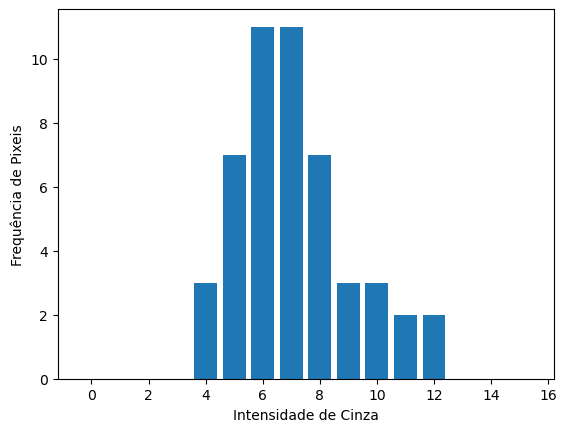

In [2]:
def histogram(mat, n):
    hist = np.zeros(n).astype(int)
    

    for i, line in enumerate(matrix):
        for j, item in enumerate(line):
            try:
                hist[mat[i,j]] += 1
            except:
                pass
            
    return(hist)

values = 16

matrixHist = histogram(matrix, values)
plt.bar(range(values), matrixHist)
plt.xlabel('Intensidade de Cinza')
plt.ylabel('Frequência de Pixeis')

c) Qual o histograma acumulado? 

Text(0, 0.5, 'Frequência de Pixeis')

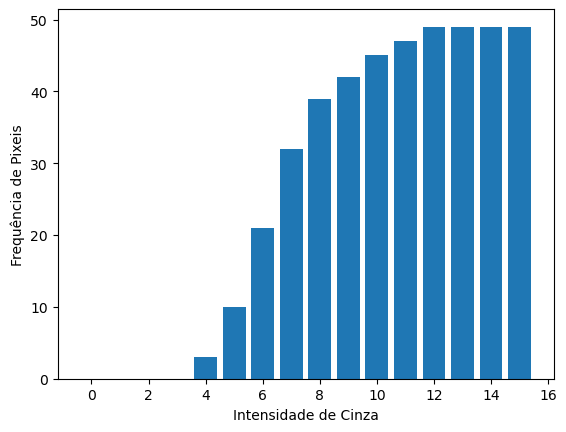

In [3]:
histCumulative = np.zeros(matrixHist.shape).astype(int)

histCumulative[0] = matrixHist[0]
for i in range(1, values):
    histCumulative[i] = matrixHist[i] + histCumulative[i-1]
    
plt.bar(range(values), histCumulative)
plt.xlabel('Intensidade de Cinza')
plt.ylabel('Frequência de Pixeis')

d) Qual o histograma normalizado?

[[  0  12  38  38  38  50  25]
 [ 38  25  38  12  38  38  38]
 [ 25  12   0  75 100 100  88]
 [ 75  62  50  38  12  12  25]
 [ 88  50  50  50  38  25  25]
 [ 12  25  38  25  25  25  25]
 [  0  12  75  62  62  50  50]]


Text(0, 0.5, 'Frequência de Pixeis')

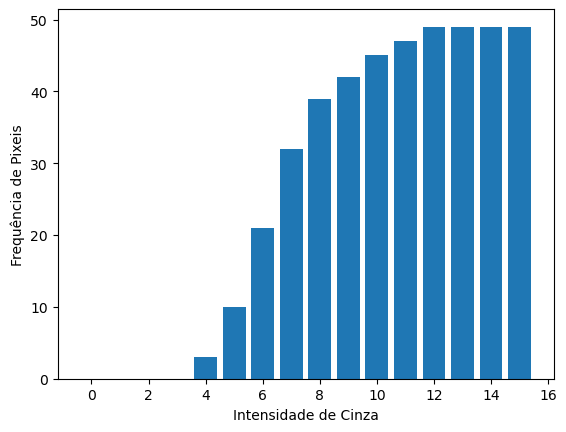

In [4]:
normImg = cv2.normalize(matrix,  None, 0, 100, cv2.NORM_MINMAX)
print (normImg)

histNormalized = np.zeros(matrixHist.shape).astype(int)

histNormalized[0] = matrixHist[0]
for i in range(1, values):
    histNormalized[i] = matrixHist[i] + histNormalized[i-1]
    
plt.bar(range(values), histNormalized)
plt.xlabel('Intensidade de Cinza')
plt.ylabel('Frequência de Pixeis')

e) Para se determinar automaticamente a transformação de contraste a partir do 
histograma, podemos utilizar a fórmula Y = a*X + b,  que deve ser aplicada a 
uma imagem digital. Podemos seguir o procedimento: 
- Percorre-se a imagem X para se descobrir seus valores digitais 
mínimo e máximo, Xmin e Xmax. Opcionalmente defina um Xmin e 
um Xmax baseado no histograma da imagem. 
- Calcula-se o parâmetro a, da transformação, pela relação:  
a= 255.0/(Xmax-Xmin) . 
- Calcula-se o parâmetro b, da transformação, pela relação: 
b=-a*Xmin . 
- Aplica-se essa relação, Y = aX + b, para cada valor pixel da imagem de 
entrada X obtendo-se o nível digital da imagem de saída Y. 
- Defina a matriz resultante. 

In [5]:
a = 255/(np.max(matrix) - np.min(matrix))
b = -a*np.min(matrix)

contMatrix = np.array(list(map(lambda X: a * X + b, matrix)))

print (contMatrix)

[[  0.     31.875  95.625  95.625  95.625 127.5    63.75 ]
 [ 95.625  63.75   95.625  31.875  95.625  95.625  95.625]
 [ 63.75   31.875   0.    191.25  255.    255.    223.125]
 [191.25  159.375 127.5    95.625  31.875  31.875  63.75 ]
 [223.125 127.5   127.5   127.5    95.625  63.75   63.75 ]
 [ 31.875  63.75   95.625  63.75   63.75   63.75   63.75 ]
 [  0.     31.875 191.25  159.375 159.375 127.5   127.5  ]]


f) Como fica a representação da imagem comprimida utilizando a seguinte 
transformação: 

“intensidades <= 8” → 8  
“intensidades iguais a 9 ou 10” → 10  
“intensidades >= 11 “ → 11

In [6]:
itemA = np.array(list(map(lambda X : 8 if X <= 8 else X, matrix.flatten()))).reshape(7, 7)
itemB = np.array(list(map(lambda X : 10 if (X == 10 or X == 9) else X, matrix.flatten()))).reshape(7, 7)
itemC = np.array(list(map(lambda X : 11 if X >= 11 else X, matrix.flatten()))).reshape(7, 7)

print ('\n', itemA)
print ('\n', itemB)
print ('\n', itemC)


 [[ 8  8  8  8  8  8  8]
 [ 8  8  8  8  8  8  8]
 [ 8  8  8 10 12 12 11]
 [10  9  8  8  8  8  8]
 [11  8  8  8  8  8  8]
 [ 8  8  8  8  8  8  8]
 [ 8  8 10  9  9  8  8]]

 [[ 4  5  7  7  7  8  6]
 [ 7  6  7  5  7  7  7]
 [ 6  5  4 10 12 12 11]
 [10 10  8  7  5  5  6]
 [11  8  8  8  7  6  6]
 [ 5  6  7  6  6  6  6]
 [ 4  5 10 10 10  8  8]]

 [[ 4  5  7  7  7  8  6]
 [ 7  6  7  5  7  7  7]
 [ 6  5  4 10 11 11 11]
 [10  9  8  7  5  5  6]
 [11  8  8  8  7  6  6]
 [ 5  6  7  6  6  6  6]
 [ 4  5 10  9  9  8  8]]


2) Implemente um programa que deverá solicitar ao usuário as coordenadas de dois 
pontos P1 e P2 (inicio e fim da região) localizados dentro dos limites do tamanho 
da  imagem  e  exibir  que  lhe  for  fornecida.  Entretanto,  a  região  definida  pelo 
retângulo definidos pelos pontos P1 e P2 será exibida com o negativo da imagem 
na região correspondente.

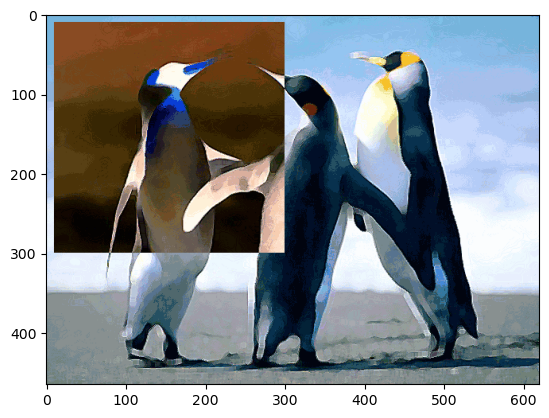

In [7]:
img = cv2.imread('pinguim.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

xPos1 = int(input('Posição X inicial: '))
xPos2 = int(input('Posição X final: '))
yPos1 = int(input('Posição Y inicial: '))
yPos2 = int(input('Posição Y final: '))

if xPos1 < 0 or xPos1 > img.shape[1]:
    raise Exception('Posição X inicial fora do intervalo da imagem')
elif xPos2 < 0 or xPos2 > img.shape[1]:
    raise Exception('Posição X final fora do intervalo da imagem')
elif yPos1 < 0 or yPos1 > img.shape[0]:
    raise Exception('Posição Y inicial fora do intervalo da imagem')
elif yPos2 < 0 or yPos2 > img.shape[0]:
    raise Exception('Posição Y final fora do intervalo da imagem')

img[xPos1:xPos2, yPos1:yPos2] = (255 - img[xPos1:xPos2, yPos1:yPos2])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))